In [3]:
# phase_kickback.ipynb

import numpy as np
from IPython.display import display
from qis102_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_bloch_multivector,
    plot_distribution,
)
from qiskit_aer import AerSimulator


def print_ndarray_info(name, a):
    print(f"Type of {name} is {type(a).__name__}")
    print(f"Number of dimensions of {name} = {a.ndim}")
    print(f"Shape of dimensions of {name} = {a.shape}")
    print(f"Length of {name} = {len(a)}")
    print(f"Size of {name} = {a.size}")


# Cell 1 - Calculate tensor product using a "row vector"
# which is a 1-dimensional structure having 2 elements

t = np.array([0, 1])
display(as_latex(t, prefix=r"\mathbf{T}=1="))
print_ndarray_info("T", t)

t3 = np.kron(t, np.kron(t, t))
display(as_latex(t3, prefix=r"\mathbf{T^{\otimes 3}}="))
print_ndarray_info("T3", t3)

<IPython.core.display.Math object>

Type of T is ndarray
Number of dimensions of T = 1
Shape of dimensions of T = (2,)
Length of T = 2
Size of T = 2


<IPython.core.display.Math object>

Type of T3 is ndarray
Number of dimensions of T3 = 1
Shape of dimensions of T3 = (8,)
Length of T3 = 8
Size of T3 = 8


In [4]:
# Cell 2 - Tensor product using a "column vector"
# which now created is a true 2-dimensional matrix (2x1)

t = np.array([[0], [1]])
display(as_latex(t, prefix=r"\mathbf{T}=1="))
print_ndarray_info("T", t)

t3 = np.kron(t, np.kron(t, t))
display(as_latex(t3, prefix=r"\mathbf{T^{\otimes 3}}="))
print_ndarray_info("T3", t3)

<IPython.core.display.Math object>

Type of T is ndarray
Number of dimensions of T = 2
Shape of dimensions of T = (2, 1)
Length of T = 2
Size of T = 2


<IPython.core.display.Math object>

Type of T3 is ndarray
Number of dimensions of T3 = 2
Shape of dimensions of T3 = (8, 1)
Length of T3 = 8
Size of T3 = 8


In [5]:
# Cell 3 - Tensor product using a "column vector"
# but transforming the vector to a 2D matrix
# by adding a new axis right before it is displayed

t = np.array([0, 1])
print_ndarray_info("T", t)
display(as_latex(t, prefix=r"\mathbf{T}=1="))

t3 = np.kron(t, np.kron(t, t))
print_ndarray_info("T3", t3)
display(as_latex(t3, prefix=r"\mathbf{T^{\otimes 3}}="))
display(as_latex(t3, prefix=r"\mathbf{T^{\otimes 3}}=", column=True))

t3 = t3[:, np.newaxis]
print_ndarray_info("T3", t3)
display(as_latex(t3, prefix=r"\mathbf{T^{\otimes 3}}="))

Type of T is ndarray
Number of dimensions of T = 1
Shape of dimensions of T = (2,)
Length of T = 2
Size of T = 2


<IPython.core.display.Math object>

Type of T3 is ndarray
Number of dimensions of T3 = 1
Shape of dimensions of T3 = (8,)
Length of T3 = 8
Size of T3 = 8


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Type of T3 is ndarray
Number of dimensions of T3 = 2
Shape of dimensions of T3 = (8, 1)
Length of T3 = 8
Size of T3 = 8


<IPython.core.display.Math object>

In [ ]:
# Cell 4 - X:H Circuit

qc = QuantumCircuit(1)
qc.x(0)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.measure_all()

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))

counts = result.get_counts(qc)
display(plot_distribution(counts))


In [ ]:
# Cell 5 - RY:RZ Circuit

qc = QuantumCircuit(1)
qc.ry(np.pi / 2, 0)
qc.save_statevector("sv1")
qc.rz(np.pi, 0)
qc.save_statevector("sv2")
qc.measure_all()

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))

counts = result.get_counts(qc)
display(plot_distribution(counts))


In [ ]:
# Cell 6 - CNOT without entanglement (no phase kickback)

qc = QuantumCircuit(2)
qc.save_statevector("sv1")
qc.h(0)
qc.h(1)
qc.save_statevector("sv2")
qc.cx(0, 1)
qc.save_statevector("sv3")
qc.h(0)
qc.h(1)
qc.save_statevector("sv4")
qc.measure_all()

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_bloch_multivector(sv3))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(plot_bloch_multivector(sv4))

counts = result.get_counts(qc)
display(plot_distribution(counts))


In [ ]:
# Cell 7 - CNOT without entanglement (WITH phase kickback)

qc = QuantumCircuit(2)
qc.x(1)
qc.save_statevector("sv1")
qc.h(0)
qc.h(1)
qc.save_statevector("sv2")
qc.cx(0, 1)
qc.save_statevector("sv3")
qc.h(0)
qc.h(1)
qc.save_statevector("sv4")
qc.measure_all()

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_bloch_multivector(sv3))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(plot_bloch_multivector(sv4))

counts = result.get_counts(qc)
display(plot_distribution(counts))


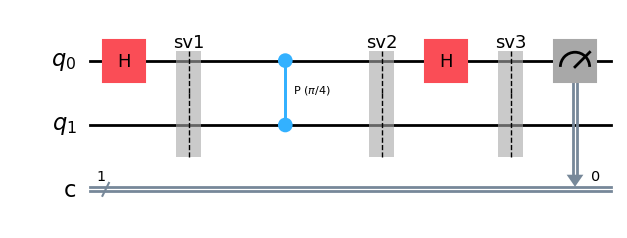

<IPython.core.display.Math object>

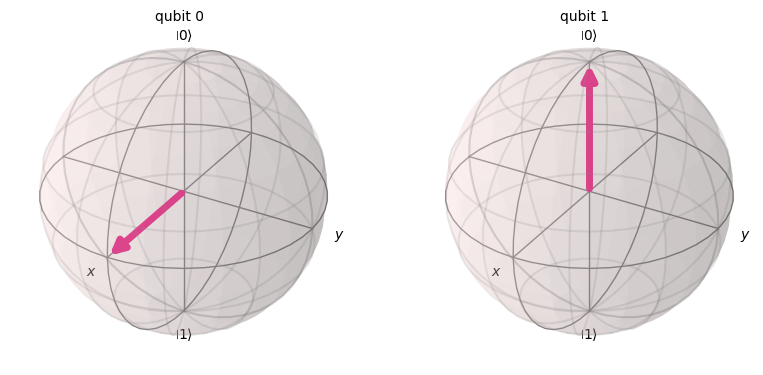

<IPython.core.display.Math object>

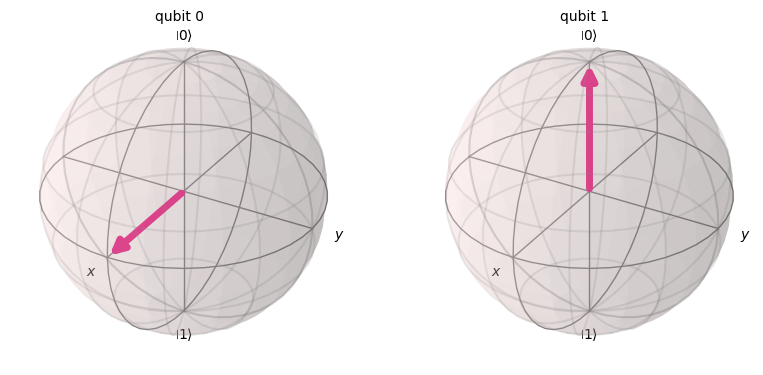

<IPython.core.display.Math object>

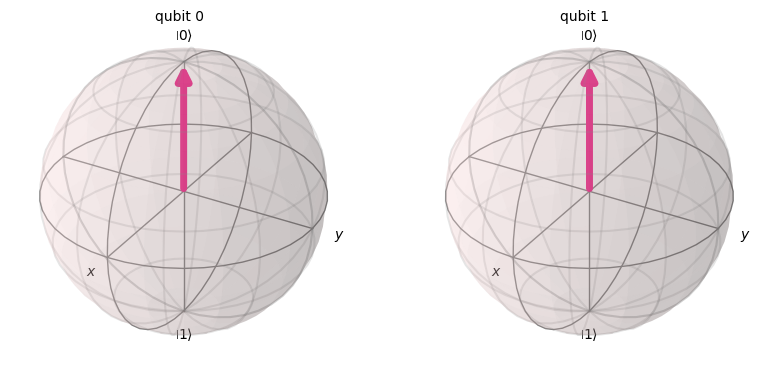

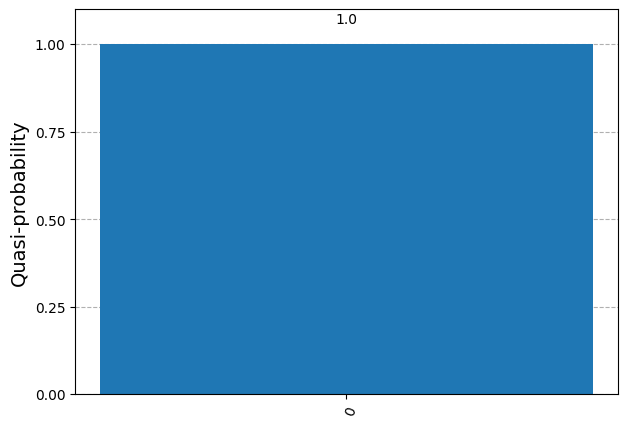

In [6]:
# Cell 8 - CPHASE (no entanglement) without phase kickback

qc = QuantumCircuit(2, 1)
qc.h(0)
qc.save_statevector("sv1")
qc.cp(np.pi / 4, 0, 1) # c phase: applies a phase shift symmetrically to both target and control lines but only
# when both qubits are in the |1> state,=
qc.save_statevector("sv2")
qc.h(0)
qc.save_statevector("sv3")
qc.measure(0, 0)

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_bloch_multivector(sv3))

counts = result.get_counts(qc)
display(plot_distribution(counts))

In [ ]:
# Cell 9 - CPHASE (no entanglement) WITH phase kickback

qc = QuantumCircuit(2, 1)
qc.h(0)
qc.x(1)
qc.save_statevector("sv1")
qc.cp(np.pi / 4, 0, 1)
qc.save_statevector("sv2")
qc.h(0)
qc.save_statevector("sv3")
qc.measure(0, 0)

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_bloch_multivector(sv3))

counts = result.get_counts(qc)
display(plot_distribution(counts))


In [ ]:
# Cell 10 - Phase Estimation (exact match)

qc = QuantumCircuit(2, 1)
qc.h(0)
qc.p(-np.pi / 4, 0) # suppose we dont know this phase: we want to be able to estimate it
qc.x(1)
qc.save_statevector("sv1")
qc.cp(np.pi / 4, 0, 1)
qc.save_statevector("sv2")
qc.h(0)
qc.save_statevector("sv3")
qc.measure(0, 0)

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_bloch_multivector(sv3))

counts = result.get_counts(qc)
display(plot_distribution(counts))


In [ ]:
# Cell 11 - Phase Estimation (near match)

qc = QuantumCircuit(2, 1)
qc.h(0)
qc.p(-np.pi / 8, 0)
qc.x(1)
qc.save_statevector("sv1")
qc.cp(np.pi / 4, 0, 1)
qc.save_statevector("sv2")
qc.h(0)
qc.save_statevector("sv3")
qc.measure(0, 0)

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_bloch_multivector(sv3))

counts = result.get_counts(qc)
display(plot_distribution(counts))
